# Fundamentos de Programación en Pyhton: Práctica

La práctica trata de ver la correlación en gráfico entre la esperanza de vida y la renta per cápita de diferentes paises

## 1. Usar la librería pandas para leer el dataset y obtener una tabla con una cabecera de 15 filas en la que los datos aparezcan en orden ascendente según los valores de la columna *Esperanza de vida*

Importamos el dataset *info_pais.csv*

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(
    r'datasets/Info_pais.csv',
    encoding= 'ISO-8859-1',
    delimiter= ';'
)

Ordenamos los 15 primeros valores que salgan por pantalla según los niveles de esperanza de vida de manera ascendente mediante el método **sort_values()**

In [3]:
df_order = df.sort_values(
    'Esperanza de vida',
    ascending= True
)

df_order.head(15)

,País,Poblacion,Renta per capita,Esperanza de vida
151,Central African Republic,4596023,424,"52,8"
149,Lesotho,2091534,1233,"53,7"
128,Chad,15016753,657,54
143,Sierra Leone,7488423,504,"54,3"
28,Nigeria,190873244,1969,"54,3"
89,Côte d'Ivoire,24437470,1529,"57,4"
158,Guinea-Bissau,1828145,737,58
120,Equatorial Guinea,1262002,9741,"58,4"
110,Mali,18512430,828,"58,9"
91,Cameroon,24566073,1422,"58,9"


## 2. Usar la librería matplotlib para crear un gráfico mediante el método scatter(). En el eje x hay que representar los datos de la columna “Renta per capita” y en el eje y los datos de la columna “Esperanza de vida”, y añadir un título y etiquetas a los ejes x e y

In [4]:
import matplotlib.pyplot as plt

Una vez importada la libreria matplotlib el módulo pyplot, podemos comenzar a realiza el scatter plot con valores numéricos en los ejes 

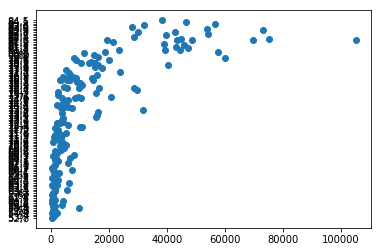

In [7]:
plt.scatter(
    df_order['Renta per capita'],
    df_order['Esperanza de vida']
)

No hay que olvidar los elementos como la etiqueta de los datos 

Text(0, 0.5, 'Esperanza de vida')

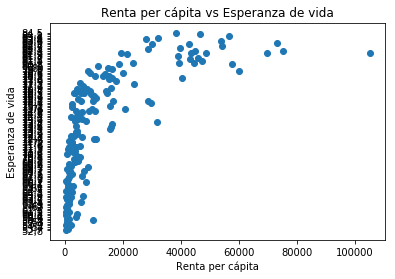

In [8]:
plt.scatter(
    df_order['Renta per capita'],
    df_order['Esperanza de vida']
)

plt.title('Renta per cápita vs Esperanza de vida')
plt.xlabel('Renta per cápita')
plt.ylabel('Esperanza de vida')

A simple vista percibimos que el eje y y sus valores no se distinguen entre unos y otros valores. Del mismo modo ocurre con la nube de puntos donde vemos que se agrupan muchos cerca del eje y. Aun asi, es posible ver que la correlación forma una nube de puntos con forma de curva cuyo codo mira al eje y. Esto quizas explique a ciertos valores de esperanza de vida no se vean afectados por la renta per capita, es decir, son independientes hasta llegado un punto donde se aplana la curva a mayor nivel de renta

## 3. Configurar el gráfico para que los puntos sean proporcionales tanto en tamaño como en color para cada país

Para ello, es preciso normalizar el nivel de población dado la disparidad de valores poblacionales entre los diferentes países. De tal modo, creamos una nueva columna df['Poblacion_normalizada'] que es resultado de aplicar la siguiente formula 

In [15]:
df_order['Poblacion_normalizada'] = df_order['Poblacion']/(max(df_order['Poblacion'])/10000)

In [16]:
df_order.head()

,País,Poblacion,Renta per capita,Esperanza de vida,Poblacion_normalizada
151,Central African Republic,4596023,424,"52,8",32.343086
149,Lesotho,2091534,1233,"53,7",14.718522
128,Chad,15016753,657,54,105.675740
143,Sierra Leone,7488423,504,"54,3",52.697454
28,Nigeria,190873244,1969,"54,3",1343.211239


Ahora inlcuiremos el **parámetro s** dentro del método scatter que permitirá diferencia por tamaño de punto el nivel de poblacióne entre los diferentes países

Text(0, 0.5, 'Esperanza de vida')

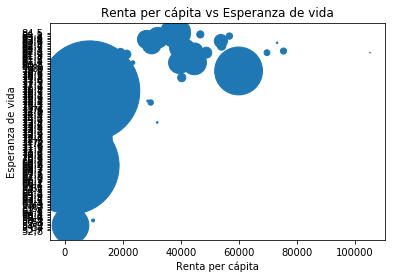

In [17]:
plt.scatter(
    df_order['Renta per capita'],
    df_order['Esperanza de vida'],
    s=df_order['Poblacion_normalizada']
)

plt.title('Renta per cápita vs Esperanza de vida')
plt.xlabel('Renta per cápita')
plt.ylabel('Esperanza de vida')

El gráfico que resulta ahora sí recoge una variable más que es el tamaño poblacional de los países. De momento se observa problemas de visualización dentro del gráfico como el solapamiento entre cada uno de los puntos.

## 4. Asignar al gráfico un tamaño de 14.5 x 10 pulgadas

Cambiaremos el aspecto del gráfico evitando el problema comentado anteriormente. Lo que pretendemos es ampliar el nivel de pulgadas del plot resultante mediante el método **set_size_inches()**

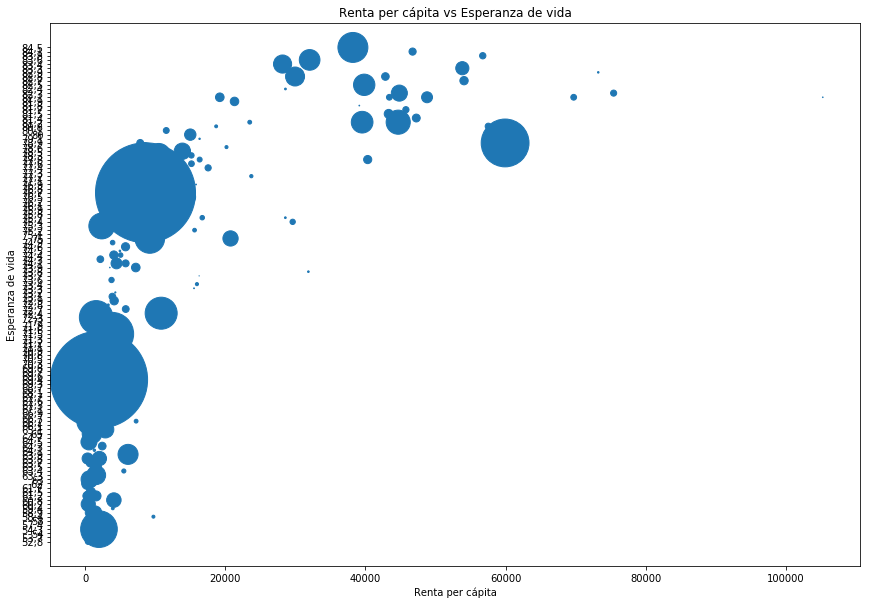

In [21]:
plt.scatter(
    df_order['Renta per capita'],
    df_order['Esperanza de vida'],
    s=df_order['Poblacion_normalizada']
)

plt.title('Renta per cápita vs Esperanza de vida')
plt.xlabel('Renta per cápita')
plt.ylabel('Esperanza de vida')

fig= plt.gcf()
fig.set_size_inches(14.5,10)

Como bien se ve, ahora si que parece estar algo mejor la distribución de los puntos y es posible distinguir entre tamaños poblacionales pero aun sigue el problema de ver que país se trata en cada caso. 

## 5. Añadir colores a los países en función de los valores de la columna *Poblacion_normalizada*

Añadimos colores a cada punto según el tamaño poblacional, que se corresponderá con cada país en cuestión. Una vez más, incluiremos el **parámetro c** dentro del método scatter y que determina el color de la etiqueta de país 

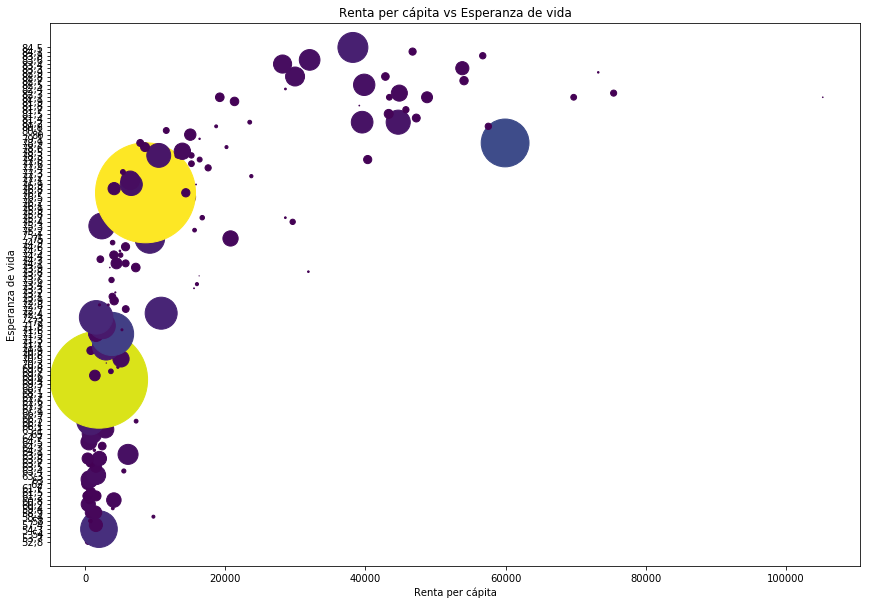

In [23]:
plt.scatter(
    df_order['Renta per capita'],
    df_order['Esperanza de vida'],
    s=df_order['Poblacion_normalizada'],
    c=df_order['Poblacion_normalizada']
)

plt.title('Renta per cápita vs Esperanza de vida')
plt.xlabel('Renta per cápita')
plt.ylabel('Esperanza de vida')

fig= plt.gcf()
fig.set_size_inches(14.5,10)

Obtenidos tamaños colores, el gráfico va tomando forma y podemos ir más alla. Por ejemplo, incluir el nombre por cada punto significativo dentro de la gráfica

## 6. Añadir la etiqueta del nombre del país dentro de cada burbuja

Conseguiremos este porpósito a través del método **annotate()**, añadiendo solo a los 10 primeros países

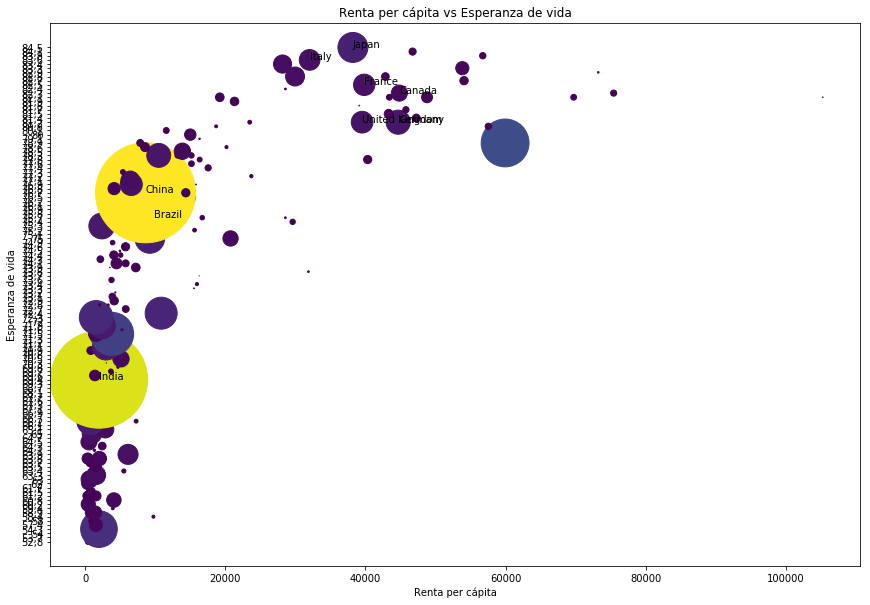

In [28]:
plt.scatter(
    df_order['Renta per capita'],
    df_order['Esperanza de vida'],
    s=df_order['Poblacion_normalizada'],
    c=df_order['Poblacion_normalizada']
)

plt.title('Renta per cápita vs Esperanza de vida')
plt.xlabel('Renta per cápita')
plt.ylabel('Esperanza de vida')

fig= plt.gcf()
fig.set_size_inches(14.5,10)

for i in range(1,10): #solo para las 10 primeras iteraciones
    plt.annotate(
        df_order['País'][i],
        (
            df_order['Renta per capita'][i],
            df_order['Esperanza de vida'][i]
        )
    )

Por ahora se puede contemplar los países con gran tamaño en color y texto dentro del gráfico, lo que nos ayuda a entender mejor el gráfico y sobre todo distinguirlos. Cone estos diez etiquetas evitamos la sobreabundancia de etiquetas y problemas de interpretabiliad del gráfico

## 7. Mejorar la representación de los datos del eje y utilizando la función yticks()

Un apunte más para ayuda de nuestra visualización del gráfico y que desde principio echábamos en falta: la distribucion de los valores del eje y. Como solución a ello, empleamos la función yticks() que me ayudará a fijar el rango e intervalo de datos

([<matplotlib.axis.YTick at 0x1fc8ba142e8>,
 <a list of 12 Text yticklabel objects>)

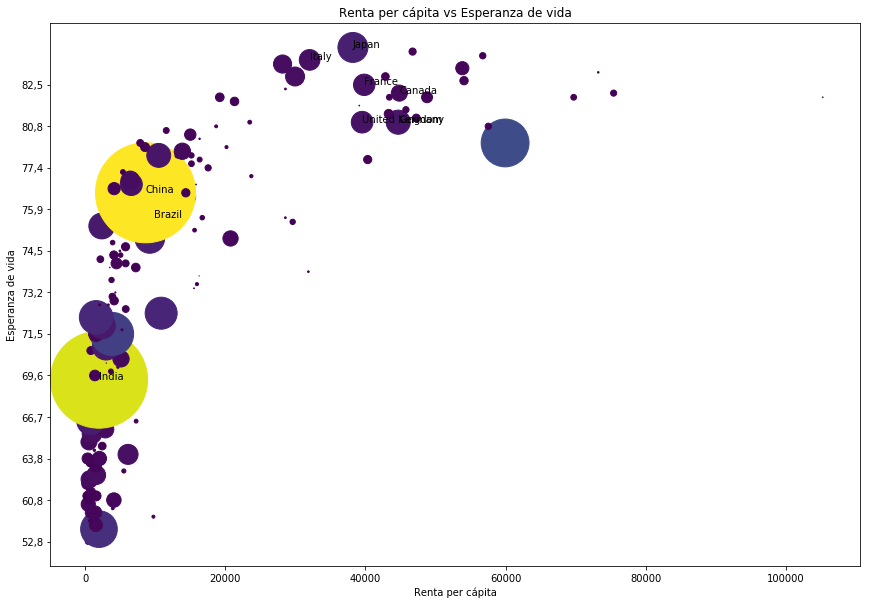

In [31]:
plt.scatter(
    df_order['Renta per capita'],
    df_order['Esperanza de vida'],
    s=df_order['Poblacion_normalizada'],
    c=df_order['Poblacion_normalizada']
)

plt.title('Renta per cápita vs Esperanza de vida')
plt.xlabel('Renta per cápita')
plt.ylabel('Esperanza de vida')

fig= plt.gcf()
fig.set_size_inches(14.5,10)

for i in range(1,10): #solo para las 10 primeras iteraciones
    plt.annotate(
        df_order['País'][i],
        (
            df_order['Renta per capita'][i],
            df_order['Esperanza de vida'][i]
        )
    )
    
plt.yticks(ticks=range(0,120,10)) #10 me indica la cantidad de saltos

## Conclusión final

Finalmente el gráfico nos esta diciendo que países de gran tamaño como china o la India cuya renta per cápita no es muy alta, no gozan de niveles de esperanza tan altos como como países europeos como Alemania Francia con niveles de renta per capita altos y con niveles poblacionales más pequeños  